In [2]:
import numpy as np
import datetime
import fnmatch
import matplotlib.pyplot as plt
from datetime import datetime
import pickle
import kuka_utils as u
from skgstat import Variogram
# from skgstat import models
# from scipy.optimize import curve_fit

In [3]:
date_list = [
             '20191107',
            '20191114',
            '20191220',
            '20191226',
            '20200102',
            '20200109',
            '20200112',
            '20200116',
            '20200119',
            '20200124',
            '20200130'
            ]

areas = u.areas()
print(areas)

area_list = [keys for keys in areas]

mfile_path = '/Users/rosie/Documents/mosaic/mosaic_data/magnaprobe_old/magna_xy_new_sd/'
nfile_path = '/Volumes/bigLacie/mosaic_stare_nrcs_calc/'



{'North': {'x': [380, 830], 'y': [-530, -30]}, 'South': {'x': [-660, -170], 'y': [220, 620]}, 'Runway': {'x': [-320, -170], 'y': [-440, 70]}, 'Mini': {'x': [100, 290], 'y': [0, 150]}, 'Lead': {'x': [-1200, -750], 'y': [400, 620]}}


date:  20191107 mf:  ['PS122-1_6-50-magnaprobe-transect-20191107-PS122-1_6-50_raw-20191106-UTC-6.csv']
date:  20191114 mf:  ['PS122-1_7-62-magnaprobe-transect-20191114-PS122-1_7-62_raw-20191114-UTC-6.csv']
date:  20191220 mf:  ['PS122-2_16-83-magnaprobe-transect-20191219_PS122-2_16-83_raw-20191219-UTC-6.csv']
date:  20191226 mf:  ['PS122-2_17-113-magnaprobe-transect-20191226_PS122-2_17-113_raw-20191226-UTC-6.csv']
date:  20200102 mf:  ['PS122-2_18-80-magnaprobe-transect-20200102_PS122-2_18-80_raw-20200102-UTC-0.csv']
date:  20200109 mf:  ['PS122-2_19-110-magnaprobe-transect-20200109_PS122-2_19-110_raw-20200109-UTC-0.csv']
date:  20200112 mf:  ['PS122-2_19-139-magnaprobe-transect-20200112_PS122-2_19-139_raw-20200112-UTC-0.csv']
date:  20200116 mf:  ['PS122-2_20-95-magnaprobe-transect-20200116_PS122-2_20-95_raw-20200116-UTC-0.csv']
date:  20200119 mf:  ['PS122-2_20-124-magnaprobe-transect-20200119_PS122-2_20-124_raw-20200119-UTC-0.csv']
date:  20200124 mf:  ['PS122-2_21-141-magnaprobe-tr

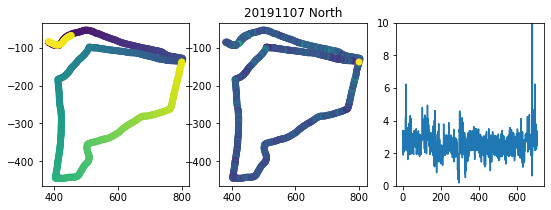

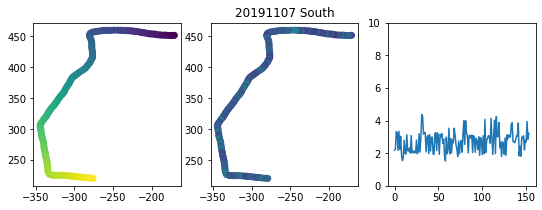

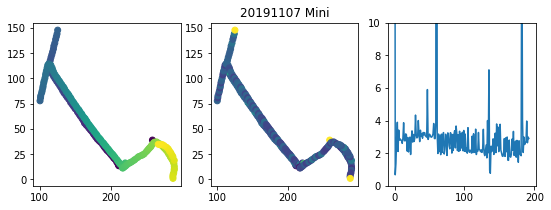

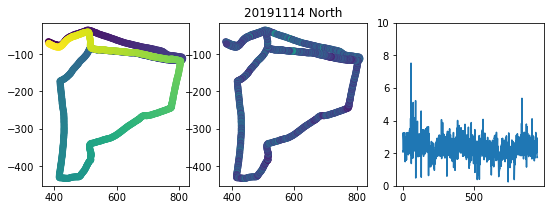

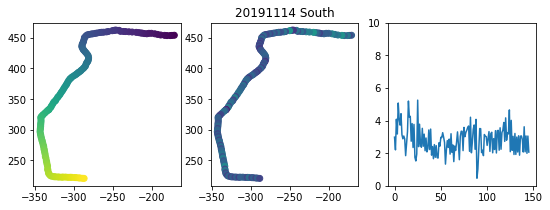

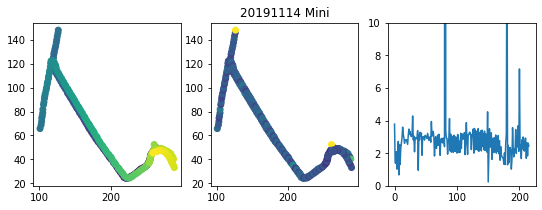

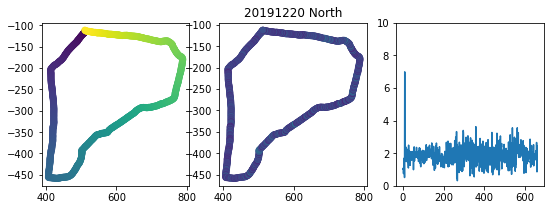

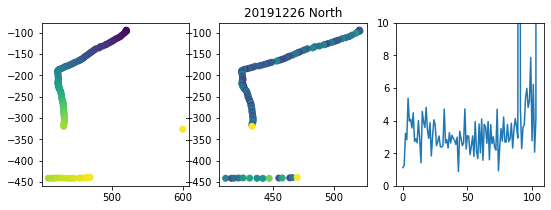

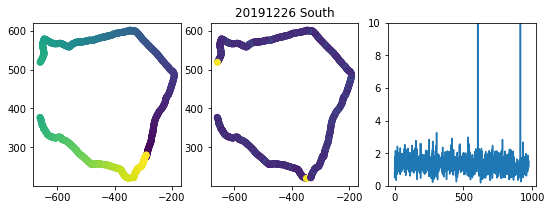

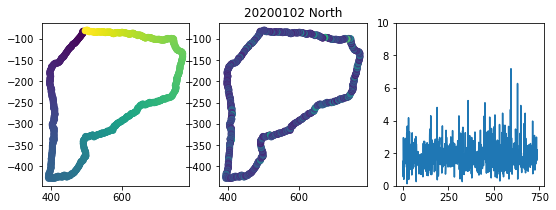

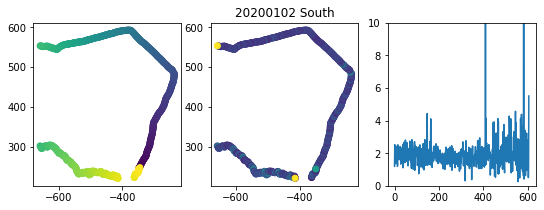

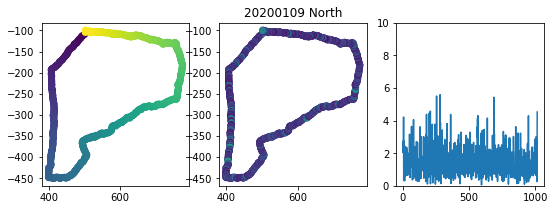

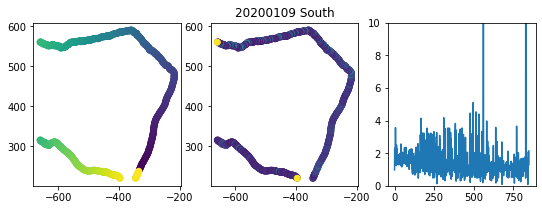

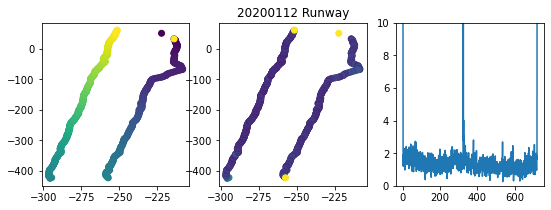

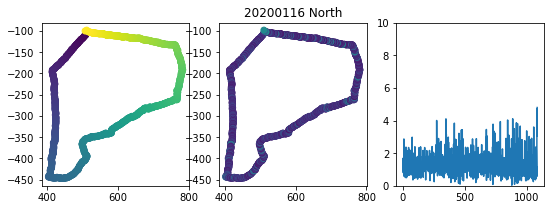

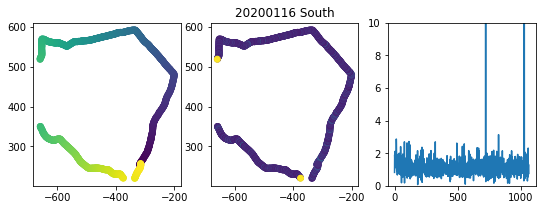

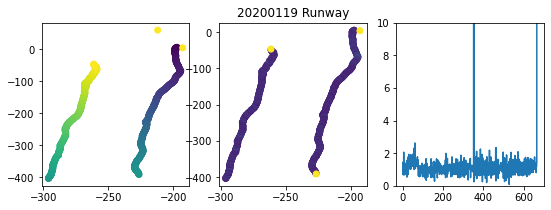

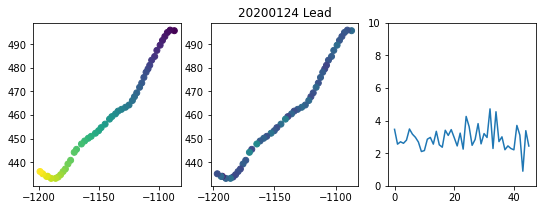

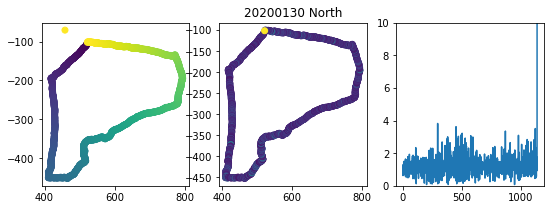

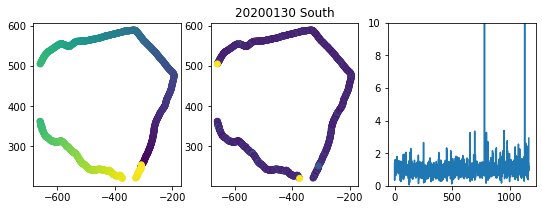

In [4]:
#start to look at how magnaprobe data were collected
for date in date_list:
    mg = u.get_magna_mosaic(date)
    nans = np.where(np.array(mg['SnowDepth_m']) != np.array(mg['SnowDepth_m']))[0]

    mg_x = np.delete(np.array(mg['x']),(nans))
    mg_y = np.delete(np.array(mg['y']),(nans))
    mg_depth = np.delete(np.array(mg['SnowDepth_m']),(nans))

    for a in area_list:
        index = u.index_areas(mg_x, mg_y)
        if len(index[a]) > 20:
            index = u.index_areas(mg_x, mg_y)
            dist = np.array([((mg_x[index[a]][i+1] - mg_x[index[a]][i])**2 + 
                (mg_y[index[a]][i+1] - mg_y[index[a]][i])**2)**.5 for i in range(len(index[a])-1)])
            fig, ax = plt.subplots(1, 3, figsize = (9, 3))
            ax[0].scatter(mg_x[index[a]], mg_y[index[a]], c = np.arange(len(index[a])))
            ax[1].scatter(mg_x[index[a]][:-1], mg_y[index[a]][0:-1], c = dist, vmin = 0, vmax = 10)
            ax[1].set_title(date + ' ' + a)
            ax[2].plot(dist)
            ax[2].set_ylim(0,10)
            
            mdist = np.mean(dist[dist <= 10])
plt.show()

date:  20200123 mf:  ['PS122-2_21-141-magnaprobe-transect-20200123_PS122-2_21-141_raw-20200123-UTC-6.csv', 'PS122-2_21-140-magnaprobe-transect-20200123_PS122-2_21-140_raw-20200123-UTC-0.csv']


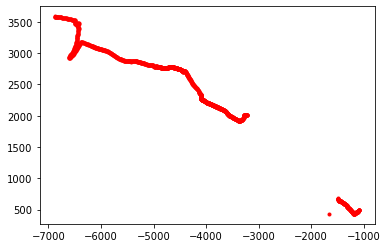

In [5]:
#checking why not many points around the lead region
mg = u.get_magna_mosaic('20200123')
plt.plot(mg['x'], mg['y'], 'r.')
#can see it is because there is a gap in data collected

date:  20191107 mf:  ['PS122-1_6-50-magnaprobe-transect-20191107-PS122-1_6-50_raw-20191106-UTC-6.csv']
20191107 North 707
20191107 South 155
20191107 Runway 0
20191107 Mini 194
20191107 Lead 0
date:  20191114 mf:  ['PS122-1_7-62-magnaprobe-transect-20191114-PS122-1_7-62_raw-20191114-UTC-6.csv']
20191114 North 945
20191114 South 147
20191114 Runway 0
20191114 Mini 217
20191114 Lead 0
date:  20191220 mf:  ['PS122-2_16-83-magnaprobe-transect-20191219_PS122-2_16-83_raw-20191219-UTC-6.csv']
20191220 North 663
20191220 South 0
20191220 Runway 1
20191220 Mini 0
20191220 Lead 0
date:  20191226 mf:  ['PS122-2_17-113-magnaprobe-transect-20191226_PS122-2_17-113_raw-20191226-UTC-6.csv']
20191226 North 106
20191226 South 976
20191226 Runway 0
20191226 Mini 0
20191226 Lead 0
date:  20200102 mf:  ['PS122-2_18-80-magnaprobe-transect-20200102_PS122-2_18-80_raw-20200102-UTC-0.csv']
20200102 North 740
20200102 South 606
20200102 Runway 0
20200102 Mini 1
20200102 Lead 0
date:  20200109 mf:  ['PS122-2_19-1

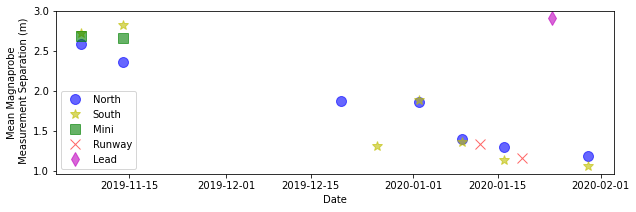

In [5]:
#willatt_figure_S3
#calculate distance between magnaprobe points

fig, ax = plt.subplots(1, 1, figsize = (10, 3))

for date in date_list:
    mg = u.get_magna_mosaic(date)
    nans = np.where(np.array(mg['SnowDepth_m']) != np.array(mg['SnowDepth_m']))[0]

    mg_x = np.delete(np.array(mg['x']),(nans))
    mg_y = np.delete(np.array(mg['y']),(nans))
    mg_depth = np.delete(np.array(mg['SnowDepth_m']),(nans))

    for a in area_list:#[0:4]:
        index = u.index_areas(mg_x, mg_y)
        print(date, a, len(index[a]))
        if (len(index[a]) > 20) & ((date != '20191226') | (a != 'North')):
            index = u.index_areas(mg_x, mg_y)
            dist = np.array([((mg_x[index[a]][i+1] - mg_x[index[a]][i])**2 + 
                (mg_y[index[a]][i+1] - mg_y[index[a]][i])**2)**.5 for i in range(len(index[a])-1)])
            mdist = np.mean(dist[dist <= 10])
            if a == 'North':
                symbol = 'bo'
            if a == 'South':
                symbol = 'y*'
            if a == 'Runway':
                symbol = 'rx'
            if a == 'Mini':
                symbol = 'gs'
            if a == 'Lead':
                symbol = 'md'
            ax.plot(datetime(int(date[0:4]), int(date[4:6]), int(date[6:8])), 
                       mdist, 
                       symbol,
                       markersize = 10,
                       alpha = .6,
                       label = a)
            ax.set_xlabel('Date')
            ax.set_ylabel('Mean Magnaprobe\n Measurement Separation (m)')
            handles, labels = plt.gca().get_legend_handles_labels()
            by_label = dict(zip(labels, handles))
            ax.legend(by_label.values(), by_label.keys())
fig.savefig('/Users/rosie/Documents/papers/mac_rosie_mosaic/magna_meas_distance.jpg', 
             dpi = 300,
            bbox_inches = 'tight')
plt.show()

date:  20191107 mf:  ['PS122-1_6-50-magnaprobe-transect-20191107-PS122-1_6-50_raw-20191106-UTC-6.csv']
date:  20191114 mf:  ['PS122-1_7-62-magnaprobe-transect-20191114-PS122-1_7-62_raw-20191114-UTC-6.csv']
date:  20191220 mf:  ['PS122-2_16-83-magnaprobe-transect-20191219_PS122-2_16-83_raw-20191219-UTC-6.csv']
date:  20191226 mf:  ['PS122-2_17-113-magnaprobe-transect-20191226_PS122-2_17-113_raw-20191226-UTC-6.csv']
date:  20200102 mf:  ['PS122-2_18-80-magnaprobe-transect-20200102_PS122-2_18-80_raw-20200102-UTC-0.csv']
date:  20200109 mf:  ['PS122-2_19-110-magnaprobe-transect-20200109_PS122-2_19-110_raw-20200109-UTC-0.csv']
date:  20200112 mf:  ['PS122-2_19-139-magnaprobe-transect-20200112_PS122-2_19-139_raw-20200112-UTC-0.csv']
date:  20200116 mf:  ['PS122-2_20-95-magnaprobe-transect-20200116_PS122-2_20-95_raw-20200116-UTC-0.csv']
date:  20200119 mf:  ['PS122-2_20-124-magnaprobe-transect-20200119_PS122-2_20-124_raw-20200119-UTC-0.csv']
date:  20200130 mf:  ['PS122-2_22-92-magnaprobe-tra

//anaconda3/envs/icesat2/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
//anaconda3/envs/icesat2/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


means for  ['matheron'] exponential effective range (m) 34.90569886142862 sill nan rmse 0.0005460146522352205


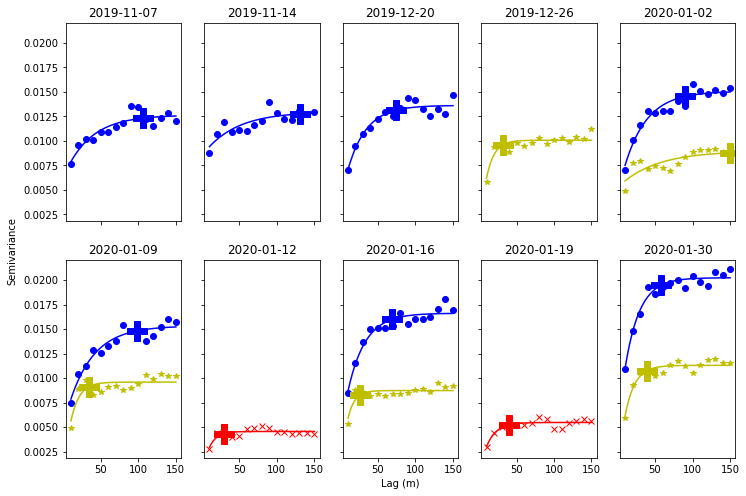

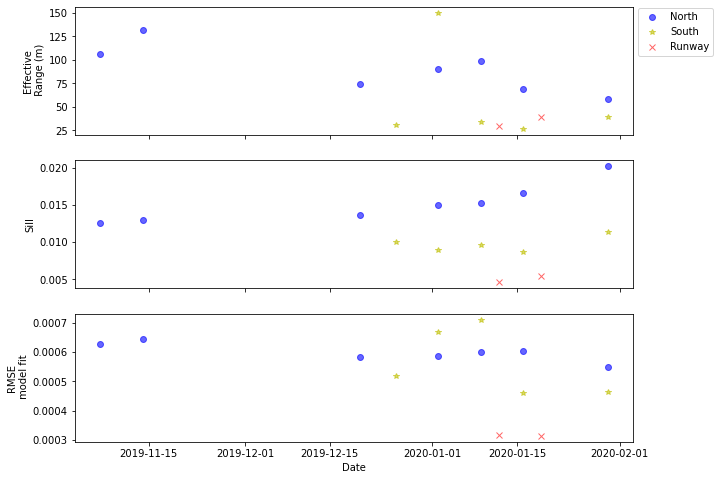

In [3]:
#willatt_figure_S4
#variograms

date_list = [
             '20191107',
            '20191114',
            '20191220',
            '20191226',
            '20200102',
            '20200109',
            '20200112',
            '20200116',
            '20200119',
            '20200130'
            ]


#for variogram
n_lags = 15
maxlag = 150
esti = ['matheron']#, 'cressie']
# mod = ['spherical']#, 'exponential', 'gaussian']
mod = ['exponential']

ncols = 5
nrows = 2
fig1, ax1 = plt.subplots(nrows, ncols, sharex = True, sharey = True, figsize = (12, 8))

fig, ax = plt.subplots(3, 1, figsize = (10,8), sharex = True)

this_rmse = []
this_sill = []
this_er = []

cols = ['b','y','r','g','m','k']

x_y_p_path = '/Volumes/bigLacie/processed_stare_new_nrcs/'

for date in date_list:#[0:1]:
            
    x_y_p_file = 'x_y_p_'+date+'_'+'Ku'+'.p'
    if (len(fnmatch.filter(os.listdir(x_y_p_path + 'x_y_p/'), x_y_p_file))) == 1:
        x_y_p = pickle.load( open(x_y_p_path  + 'x_y_p/' + x_y_p_file, "rb" ) )

    dindex = np.where(np.array(date_list) == date)[0][0]
    mg = u.get_magna_mosaic(date)
    nans = np.where(np.array(mg['SnowDepth_m']) != np.array(mg['SnowDepth_m']))[0]
    mg_x = np.delete(np.array(mg['x']),(nans))
    mg_y = np.delete(np.array(mg['y']),(nans))
    mg_depth = np.delete(np.array(mg['SnowDepth_m']),(nans))

    for a in area_list[0:3]:
        if a == 'North':
            symbol = 'bo'
        if a == 'South':
            symbol = 'y*'
        if a == 'Runway':
            symbol = 'rx'
        if a == 'Mini':
            symbol = 'gs'
        if a == 'Lead':
            symbol = 'md'

        aindex = np.where(np.array(area_list) == a)[0][0]
        
        kuka_index = u.index_areas(x_y_p['x'], x_y_p['y'])
        
        index = u.index_areas(mg_x, mg_y)
        
        if (len(index[a]) > n_lags*2) & (len(kuka_index[a]) > 0) & ((date != '20191226') | (a != 'North')):
            coords = list(zip(mg_x[index[a]], mg_y[index[a]]))
            V = Variogram(coords, mg_depth[index[a]], 
                          n_lags = n_lags, 
                          maxlag = maxlag,
                          use_nugget = True
                         )
            for estimator in esti:
                for model in mod:
                    V.estimator = estimator
                    V.model = model
                    xs = np.arange(V.bins[0], V.bins[-1]+1)
                    ys = [V.fitted_model(x) for x in xs]
                    col = int(dindex/ncols)
                    row = dindex - int(dindex/ncols)*ncols
                    ax1[col, row].plot(xs, ys, cols[aindex] + '-')
                    ax1[col, row].plot(V.describe()['effective_range'], V.fitted_model(V.describe()['effective_range']),
                            cols[aindex] + 'P', markersize = 20)

                    ax1[col, row].plot(V.bins, V.experimental, symbol)
                    ax1[col, row].set_title(date[0:4] + '-' + date[4:6] +'-' + date[6:8])
                    this_rmse.append(float(V.rmse))
                    this_sill.append(float(V.describe()['sill']))
                    this_er.append(float(V.describe()['effective_range']))

                    ax[0].plot(datetime(int(date[0:4]), int(date[4:6]), int(date[6:8])), 
                                V.describe()['effective_range'], 
                               symbol,
                               alpha = .6,
                               label = a)
                    ax[1].plot(datetime(int(date[0:4]), int(date[4:6]), int(date[6:8])), 
                                V.describe()['sill'] + V.describe()['nugget'], 
                               symbol,
                               alpha = .6,
                               label = a)
                    ax[2].plot(datetime(int(date[0:4]), int(date[4:6]), int(date[6:8])), 
                                V.rmse, 
                               symbol,
                               alpha = .6,
                               label = a)

#tidy and save summary figure
handles, labels = fig.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax[0].legend(by_label.values(), by_label.keys(), loc='upper left', bbox_to_anchor=(1,1.03))
ax[0].set_ylabel('Effective\n Range (m)')
ax[1].set_ylabel('Sill')
ax[2].set_ylabel('RMSE\n model fit')
ax[2].set_xlabel('Date')
fig.savefig('/Users/rosie/Documents/papers/mac_rosie_mosaic/variogram_summ.jpg',
           bbox_inches = 'tight',
            dpi = 300)

#tidy and save individual dates figures
ax1[1,2].set_xlabel('Lag (m)')
ax1[0,0].text(-75, -.0045, 'Semivariance', rotation = 90)
fig1.savefig('/Users/rosie/Documents/papers/mac_rosie_mosaic/variogram_dates.jpg',
           bbox_inches = 'tight',
            dpi = 300)

print('means for ', esti, model, 
      'effective range (m)', np.mean(this_er), 
      'sill', np.mean(this_sill), 
      'rmse', np.mean(this_rmse))